In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nbimporter
import  math
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..')
    
from Maze.Maze import Maze
from Maths.Cord import Cord
def behaviour(maze, placement):    
    
    data=np.zeros((maze.height, maze.width))
    for i in range(maze.height):
        for j in range(maze.width):
            if (maze.maze[i][j]==1 or maze.maze[i][j]==5):
                data[i][j]=float("NaN")
    sumData=0            
    for pos in placement:
        data[pos.X][pos.Y]+=1
        sumData+=1

        
    for i2 in range(maze.height):
        for j2 in range(maze.width):
               data[i2][j2]=data[i2][j2]/sumData*100
                
    fig, ax = plt.subplots()
    #im = ax.imshow(data, cmap=plt.cm.jet)

    palette=plt.cm.plasma
    palette.set_bad('k',1.0)
    DATA=np.ma.array(data, mask=np.isnan(data))
    im=ax.imshow(DATA,interpolation='nearest',cmap=palette, vmin=0, vmax=100)
    
    plt.colorbar(im, ax=ax)    
    fig.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()
    #print(data)
    
def convert(StringCord):
    intCord=Cord(int(StringCord.split(",")[0].split("(")[1]),int(StringCord.split(",")[1].split(")")[0]))
    return intCord

def convertToClear(clearString, maze):
    clear=[]
    cords=clearString[1:len(clearString)-1].split(")(")
    for cord in cords:
        clear.append(Cord(int(cord.split(",")[0]),int(cord.split(",")[1])))
    clear.append(maze.Initial)
    for exit in maze.Exits:
        clear.append(exit)
    return clear



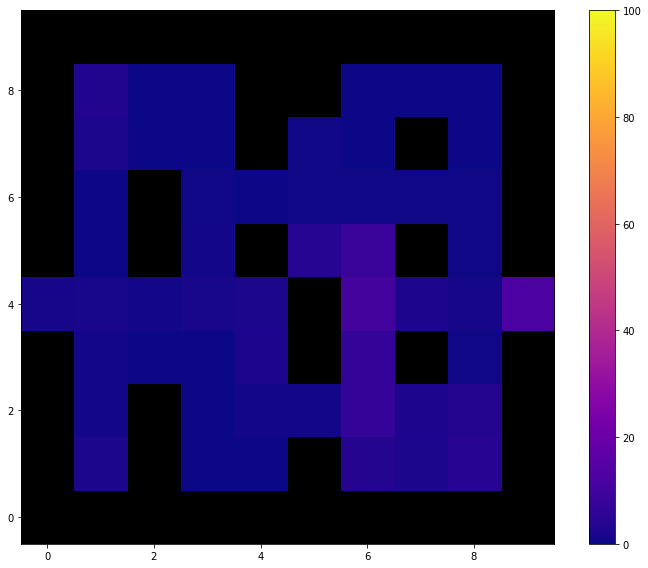

In [34]:
import nbimporter
import sys
if('..' not in sys.path):
    sys.path.insert(0,'..')
from Windows.MainWindow import MainWindow
from Maze.Maze import Maze


file=open("GamesData.txt","r")
f1=file.readlines()
#for line in f1:
    #print(line)    

#chosenLine=0
#print(len(f1))
pos=[]
initPlaces=[]
    
for l in range(len(f1)):
    chosenLine=l
    state=f1[chosenLine]
    parts=state.split("|")
    history=parts[1:(len(parts)-1)]
    m=parts[0]
    
    #pos=[]
    #initPlaces=[]
    #print(history)
    
    for i in range(len(history[0].split("#"))-1):

        pos.append(convert(history[0].split("#")[i+1].split("-")[1]))
    #pos.append(initPlaces)
    maze= Maze(m)
    for timeStep in history[1:len(history)]:

        parts2=timeStep.split("#")
        #print(parts2)
        for i in range(0,len(parts2)-2):
            #print(parts2[i+2].split("-")[1],len(parts2)-1)
            pos.append(convert(parts2[i+2].split("-")[1]))

    posS=""
    for p in pos:
        posS+=p.CordToString()+" "
    #print(posS)
    #print(history)
behaviour(maze,pos)

Mean of total length:  70.56666666666666
Mean of correct length:  65.35
Success rate:  0.9833333333333333


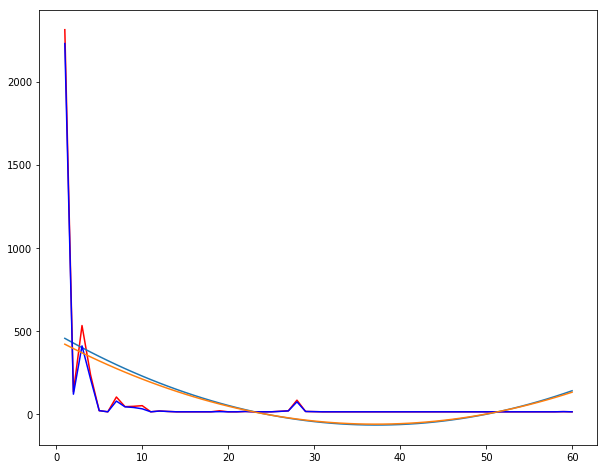

In [35]:
import numpy as np
file2=open("RunsData.txt","r")
f2=file2.readlines()
#for line in f2:
  #  print(line)    

#chosenLine=0
#print(len(f1))

testRun=[]
totalStep=[]
reward=[]
correctStep=[]
succeeded=0
cutoff=1000
for l in range(len(f2)):
    chosenLine=l
    run=f2[chosenLine]
    runData=run[0:len(run)-1].split(" ")
    testRun.append(float(runData[1]))
    totalStep.append(float(runData[2]))
    if(float(runData[2])<cutoff):
        succeeded+=1
    reward.append(float(runData[3]))
    correctStep.append(float(runData[4]))
    #print(runData)
#correctStep
print("Mean of total length: ", np.mean(np.asarray(totalStep)))
print("Mean of correct length: ",np.mean(np.asarray(correctStep)))
print("Success rate: ",succeeded/len(f2))
plt.plot(testRun, totalStep, 'r')
plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, totalStep, 2))(np.unique(testRun)))

plt.plot(testRun, correctStep, 'b')
plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, correctStep, 2))(np.unique(testRun)))

#plt.plot(testRun, reward, 'g')
#plt.plot(np.unique(testRun), np.poly1d(np.polyfit(testRun, reward, 2))(np.unique(testRun)))

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=8
plt.rcParams["figure.figsize"]=fig_size
plt.show()